9/10
Downloaded requisite libraries. 
Numpy allows for efficient storage and access of large configurations of data.
Pandas allows for easy reading of data from files into data constructs in code-accessible memory. 
Math is a standard python library that may or may not be necessary. 
Matplotlib can allow for visualization of data, may or may not be necessary. 

In [58]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math

In [59]:
data = pd.read_csv('train.csv')

In [60]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]


9/10 end

9/17
Initialized the necessary variables that I will calculate during training. 
I also defined a variety of functions that I will use in the program.
    - relu stands for rectified linear unit, and it is the name of a function that looks like fig. 1
    - drelu is my naming for the derivative of the relu function. The same convention holds for all other d-prefixed variable names. 
    - A neural network takes in an input in the form of numbers; this is the initial activation of the neurons. Each layer activates the next layer, i.e. the activation value of every neuron in layer n+1 is derived from a linear combination of all the values in layer n according to the weights in between, with a function then applied on said linear combination (such as relu). feedforward takes in an input and runs it through the network.
    - cost returns a score for how well a set of weights and biases performs on the train dataset.

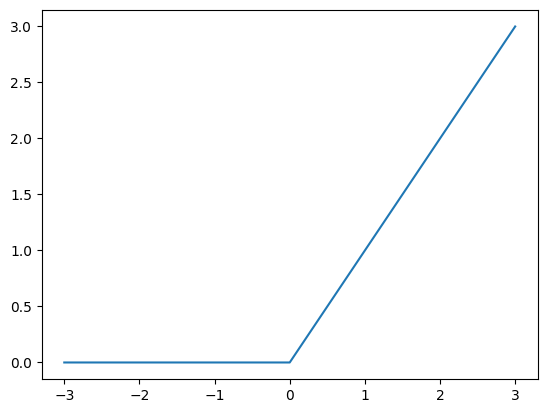

In [3]:
#fig. 1

from matplotlib import pyplot as plt
def relu(x):
    return (x>0) * x
plt.plot([-3, -2, -1, 0, 1, 2, 3], [relu(-3), relu(-2), relu(-1),relu(0),relu(1), relu(2), relu(3)])

In [ ]:
w_1 = np.random.rand(10, 784)
w_2 = np.random.rand(10, 10)
b_1 = np.random.rand(10,1)
dw_1 = np.ones((10, 784))
dw_2 = np.ones((10, 10))
db_1 = np.ones(10)

def relu(x):
    return (x>0) * x
    
def drelu(x):
    return 1 * (x > 0)

def feedforward(w_1, w_2, b_1, a_0):
    a_1 = np.matmul(w_1, a_0)
    a_1 += b_1.reshape((10,))
    for i in range(10):
        a_1[i] = relu(a_1[i])
    a_2 = np.matmul(w_2, a_1)
    return a_2

def cost(w_1, w_2, b_1):
    sum = 0
    for i in range(41000):
        temp = np.zeros(10)
        temp[Y_train[i]] = 1
        sum += np.sum((temp - feedforward(w_1, w_2, b_1, X_train[:, i])) ** 2)
    return (1/82000) * sum


9/17 end